# Título: Lectura de video, extracción cuadros, detección caras, por cada cara extracción 68 puntos a JSON

---
<div class="alert alert-info" role="alert">
<p><strong>Lectura de video y extracción cuadros</strong></p>
<p><strong>Autor</strong>: Daniel Ivan Medina Barreras</p>
<p><strong>Fecha</strong>: 20200730</p>
<p></p>
<p><strong>Referencia</strong>: g20200323_1130_VideoSacaCuadros_SacaJSONXPartesCara_Video1.ipynb/p>
<p> <strong>Descripción</strong> :  Se realiza la lectura de un video de 30 segundos y de extraen los 30 cuadros por segundo. Enseguida se analiza un cuadro y detecta si existen caras. Cada cara encontrada  se encierra en un rectángulo y se obtienen los 68 puntos de la cara, para generar un JSON con los 68 puntos.
</p>



</div>

# Lectura video, reconocimiento facial y extracción de cuadros 

In [1]:
%%bash

pwd

/home/saxsa/Documentos/face_pro_2/Proyecto


In [2]:
import imutils
from imutils import face_utils

import numpy as np

import cv2

import glob

import os
from os import path

import dlib

import datetime as dt
from datetime import datetime


import json
from json import JSONEncoder

import matplotlib.pyplot as plt

import os
from os import path


from IPython.display import Image #Plotiar imagenes de una manera ams facil

%matplotlib inline

In [3]:
class NumpyArrayEncoder(JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return JSONEncoder.default(self, obj)

Se defina la estructura que tiene el JSON

In [4]:
myJSON = '{"Person": [{"Name": "","id":""},{"DataSet": {"chin": [],"left_eyebrow":[], "right_eyebrow":[], "nose":[], "left_eye":[], "right_eye":[], "outer_lip":[], "inner_lip":[], "datetime":[]}}]}'

**NumPy**

Numpy is a library for the Python programming language that (among other things)provides support for large, multi-dimensional arrays. 

Why is that important? UsingNumPy, we can express images as multi-dimensional arrays. 

Representing images asNumPy arrays is not only computational and resource efficient, but many other imageprocessing and machine learning libraries use NumPy array representations as well.Furthermore, by using NumPy’s built-in high-level mathematical functions, we canquickly perform numerical analysis on an image.

**SciPy** 

SciPy adds further support forscientific and technical computing. One of my favorite sub-packages of SciPy is thespatial package which includes a vast amount of distance functions and a kd-treeimplementation. 

Why are distance functions important? When we “describe” an image,we perform feature extraction. 

Normally after feature extraction an image is representedby a vector (a list) of numbers. 

In order to compare two images, we rely on distance functions, such as the Euclidean distance. 

To compare two arbitrary feature vectors, we simply compute the distance between their feature vectors. 

In the case of the Euclidean distance, the smaller the distance the more “similar” the two images are.

**OpenCV**

the main goal of OpenCV is real-time image processing. 

This library has beenaround since 1999, but it wasn’t until the 2.0 release in 2009 did we see the incredibleNumPy support. 



detected facial landmarks to help us label and extract face regions, including:

    Mouth
    Right eyebrow
    Left eyebrow
    Right eye
    Left eye
    Nose
    Jaw


the (x, y)-coordinates associated with facial landmarks and how these facial landmarks can be mapped to specific regions of the face.

code that can be used to extract each of the facial regions.

how face regions are (automatically) extracted via facial landmarks and will be able to apply this knowledge to your own applications.

The facial landmark detector implemented inside dlib produces 68 (x, y)-coordinates that map to specific facial structures. 

These 68 point mappings were obtained by training a shape predictor on the labeled


Examining the image, we can see that facial regions can be accessed via simple Python indexing (assuming zero-indexing with Python since the image above is one-indexed):

**QUIJADA** (jaw)  [0, 17]<BR>
**CejaOJODERECHO** (right eyebrow) [17, 22].<BR>
**CejaOJOIZQUIERDO** (left eyebrow) [22, 27].<BR>
**NARIZ** (nose) [27, 35].<BR>
**BOCA** (mouth) [48, 68].<BR>
**OJODERECHO** (right eye) [36, 42].<BR>
**OJOIZQUIERDO** (left eye) [42, 48].<BR>



La estructura en Python es:

FACIAL_LANDMARKS_IDXS = OrderedDict([<BR>
	("mouth", (48, 68)),<BR>
	("right_eyebrow", (17, 22)),<BR>
	("left_eyebrow", (22, 27)),<BR>
	("right_eye", (36, 42)),<BR>
	("left_eye", (42, 48)),<BR>
	("nose", (27, 35)),<BR>
	("jaw", (0, 17))<BR>
])<BR>

Using this dictionary we can easily extract the indexes into the facial landmarks array and extract various facial features simply by supplying a string as a key.

**visualize_facial_landmarks**

  Esta función requiere dos argumentos, seguido de otros dos opcionales:

**image**: La imagen en donde se dibujan los puntos de la cara (The image that we are going to draw our facial landmark visualizations on)
     
**shape**: El arreglo numpy que contiene las coordenadas de los 68 puntos de la cara (The NumPy array that contains the 68 facial landmark coordinates that map to various facial parts)
     
**colors**: Una lista de tuplas BGR utilizados por codificar cada una de las regiones de los puntos de la cara (A list of BGR tuples used to color-code each of the facial landmark regions)
     
**alpha**: A parameter used to control the opacity of the overlay on the original image.


Si el parametro **colors** no se indica, se utilizan los siguientes colores para cada una de las zonas de la cara 

**QUIJADA** [0, 17]<BR> 
**CejaOJODERECHO**  [17, 22].<BR>
**CejaOJOIZQUIERDO** [22, 27].<BR>
**NARIZ**  [27, 35].<BR>
**OJODERECHO**  [36, 42].<BR>
**OJOIZQUIERDO** [42, 48].<BR>
**BOCA** [48, 68].<BR>


colors = [
    (19, 199, 109), 
    (79, 76, 240), 
    (230, 159, 23),
	(168, 100, 168), 
    (158, 163, 32),
	(163, 38, 32), 
    (180, 42, 220)
]


Detecting facial landmarks is therefore a two step process:

    Step #1: Localize the face in the image.
    Step #2: Detect the key facial structures on the face ROI.


### Idea del proyecto Clasificación Supervisada de VideosOK VideosNoOK, segun expertos dentistas

Los 68 puntos de la cara en la detección facial

Para analizar los movimientos de la boca, los puntos extremos horizontales, punto49 y punto55, y los puntos extremos verticales punto52 y punto58, son los mas importantes a determinar en las caras

Con estos puntos se obtienen la distancia AperturaHorizontal distancia (punto49, punto55) y la distancia AperturaVertical distancia(punto52, punto58)

Por cada cuadro se calculan estas dos distancias, y debemos generar una tabla

NumCuadro punto49 punto55 AperturaHorizontal punto52 punto58 AperturaVertical

De esta forma en un video de 30 segundos con 30 cuadros por segundo, tendremos una tabla de 900 registros con 7 columnas

Esto es la materia prima para empezar a determinar si el ejercicio se realiza con ritmo de abrir y cerrar la boca según el ritmo marcado por el metronomo que se escucha en los videos

Una vez teniendo esta tabla por Video, se le entrenara a un algoritmo en base a la clasificacion que la Doctora Dentista nos indique que son las secuencias adecuadas.

Asi dado un video, y segun el entrenamiento supervisado definido por la Dra Dentista, el algoritmo clasifica el VideoOK o VideoNoOK

Esta es la primera idea del proyecto

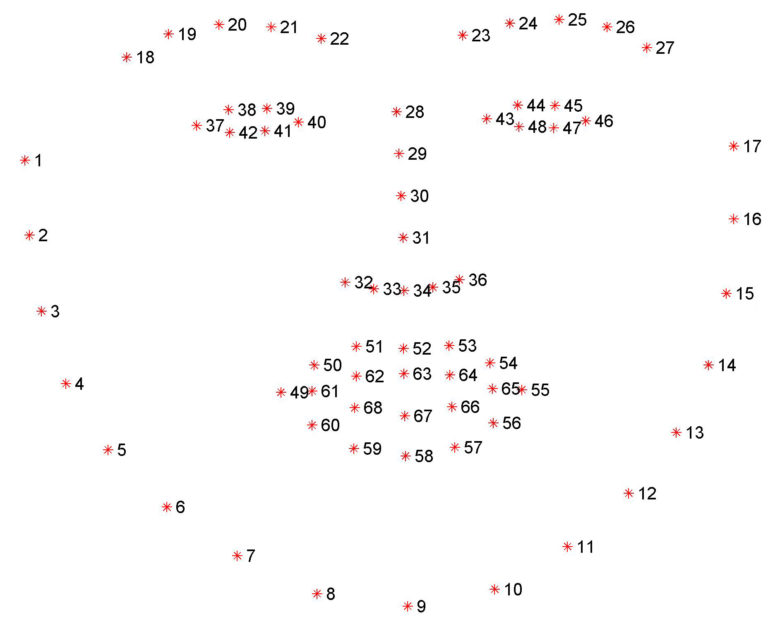

In [5]:
FechaHoy = dt.datetime.now()


print (str(FechaHoy) )

2020-07-30 21:13:57.026760


**datetime**

En Python se cuenta con la biblioteca datetime que permite la manipulación de un objeto fecha.

La salida del formato fecha es: año (year), mes (month), día (day), hora (hour), minutos (minute), segundos (second), y microsegundos (microsecond).

Para formatear la salida del objeto fecha se cuenta con el atributo strftime, el cual permite mostrar la fecha en diversos formatos.

%A Dia de la semana en texto completo (Weekday, full version)

%B Mes del año en texto completo (Month name, full version)

%f Microsecond as a decimal number, zero-padded on the left.


In [6]:
print("Día de la semana: " + FechaHoy.strftime("%A")) 

print("Mes del año: " + FechaHoy.strftime("%B")) 

print("Número Mes del año: " + FechaHoy.strftime("%m")) 

print("Día del mes: " + FechaHoy.strftime("%d")) 

print("Microsegundos: " + FechaHoy.strftime("%f")) 

print("Año: " + FechaHoy.strftime("%Y")) 

print("Día del año: " + FechaHoy.strftime("%j")) 

FechaAAAAMMDD = FechaHoy.strftime("%Y") + FechaHoy.strftime("%m") + FechaHoy.strftime("%d") 

print("Fecha AAAAMMDD: " + FechaAAAAMMDD )

FechaAAAAMMDDHHMMSSss = FechaHoy.strftime("%Y%m%d%H%M%S%f")

Día de la semana: Thursday
Mes del año: July
Número Mes del año: 07
Día del mes: 30
Microsegundos: 026760
Año: 2020
Día del año: 212
Fecha AAAAMMDD: 20200730


In [7]:
CuadrosEnVideoCaras= glob.glob("./ggDepositoImagenesCaras/**")

In [8]:
ConjuntoCuadrosVideo = []


for key in range(0 , len(CuadrosEnVideoCaras)):
    image = cv2.imread(CuadrosEnVideoCaras[key])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ConjuntoCuadrosVideo.append(image)

In [9]:
NumCuadrosEnVideo = len(ConjuntoCuadrosVideo)
NumCuadrosEnVideo

57

In [10]:
print("Número de cuadros en el Video con buenas caras =", NumCuadrosEnVideo )

Número de cuadros en el Video con buenas caras = 57


### Mostrar el primer y ultimo cuadro del video
---

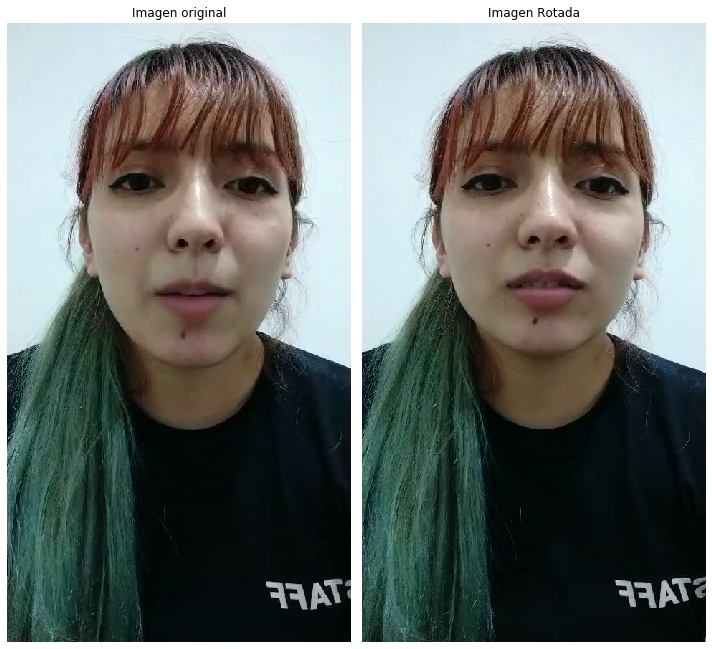

In [11]:
plt.figure(figsize=(10,10))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(ConjuntoCuadrosVideo[0], cmap='gray') 
plt.axis('off')
plt.title('Imagen original')



#Bordes
plt.subplot(1, 2, 2)
plt.imshow(ConjuntoCuadrosVideo[-1], cmap='gray')
plt.axis('off')
plt.title('Imagen Rotada');
plt.tight_layout()

Función de ayuda que se encuentra en la biblioteca ``imtools``

Se ofrecen solo para información

Se recibe un "rectángulo donde se ubica la predicción" que ofrece la biblioteca **dlib** y ofrece una estructura según un formato de trabajo de OpenCV


La estructura tiene el formato (x, y, w, h)

(CoordenadaX, CoordenadaY, AnchoRectangulo, AltoRectangulo )


``cv2.imwrite()`` method is used to save an image to any storage device. 

This will save the image according to the specified format in current working directory.

 sintaxis: ``cv2.imwrite(filename, image)``<BR>

Parameters:<BR>
filename: A string representing the file name. The filename must include image format like .jpg, .png, etc.<BR>
image: It is the image that is to be saved.<BR>

### Dlib   
Es un biblioteca de gran ayuda en Computer Vision escrita en C++ y que cuenta con una interfaz python.

Para el procesamiento de imágenes (Image Processing) cuenta con:

    Routines for reading and writing common image formats.
    Automatic color space conversion between various pixel types
    Common image operations such as edge finding and morphological operations
    Implementations of the SURF, HOG, and FHOG feature extraction algorithms.
    Tools for detecting objects in images including frontal face detection and object pose estimation.
    High quality face recognition
    
    
``get_frontal_face_detector``


This function returns an object_detector that is configured to find human faces that are looking more or less towards the camera. 

It is created using the scan_fhog_pyramid object. 


This face detector is made using the now classic Histogram of Oriented Gradients (HOG) feature combined with a linear classifier, an image pyramid, and sliding window detection scheme.  
   
This type of object detector is fairly general and capable of detecting many types of semi-rigid objects in addition to human faces.


In [12]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

* QUIJADA [0, 17]  
* CejaOJODERECHO [17, 22]  
* CejaOJOIZQUIERDO [22, 27]  
* NARIZ [27, 36]  
* OJODERECHO [36, 42]  
* OJOIZQUIERDO [42, 48]  
* BOCA [48, 68]  

### Variables necasarias para la ejecucion del programa
---

In [13]:
name = "test"
status = "ok"
id = 1

In [14]:
ggDirectorioDestino = './JSON_Caras_Partes'

### Estrucutra de las carpetas
---

In [18]:
from shutil import rmtree
if path.exists(ggDirectorioDestino):
    rmtree(ggDirectorioDestino)

In [19]:
try:
    os.stat(ggDirectorioDestino)
except:
    os.mkdir(ggDirectorioDestino)

In [17]:
for key in range(0, len(ConjuntoCuadrosVideo)):
    # load the input image, resize it, and convert it to grayscale
    image = ConjuntoCuadrosVideo[key]
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # detect faces in the grayscale image
    rects = detector(gray, 1)
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
        
        
    chin = shape[0:17] 
    left_eyebrow = shape[17:22] 
    right_eyebrow = shape[22:27] 
    nose = shape[27:36] 
    left_eye = shape[36:42] 
    right_eye = shape[42:48] 
    outer_lip = shape[48:60] 
    inner_lip = shape[60:68] 

    date_time = datetime.now()
    date_time = date_time.strftime("%m/%d/%Y, %H:%M:%S")    
    
    o = json.loads(myJSON)
        
    o["Person"][0]["name"] = name
    o["Person"][0]["id"] = id
    o["Person"][1]["DataSet"]["chin"] = chin
    o["Person"][1]["DataSet"]["left_eyebrow"] = left_eyebrow
    o["Person"][1]["DataSet"]["right_eyebrow"] = right_eyebrow
    o["Person"][1]["DataSet"]["nose"] = nose
    o["Person"][1]["DataSet"]["left_eye"] = left_eye
    o["Person"][1]["DataSet"]["right_eye"] = right_eye
    o["Person"][1]["DataSet"]["outer_lip"] = outer_lip
    o["Person"][1]["DataSet"]["inner_lip"] = inner_lip

    o["Person"][1]["DataSet"]["datetime"] = date_time

    
    id = id + 1
    
    
    with open('./JSON_Caras_Partes/data_' + str(key) + '.json', 'w') as file:
        json.dump(o, file, cls=NumpyArrayEncoder,)

KeyboardInterrupt: 

---
## Si te sirvio, <font color='brown'>COMPARTE!</font> 
- Adios

##  Mis redes:


* [GIT](https://github.com/sensito)
* [linkedin](https://www.linkedin.com/in/daniel-ivan-medina-barreras-b9725715a/)